In [1]:
import pandas as pd
import numpy as np
import matplotlib.style as style
import matplotlib.pyplot as plt

In [2]:
sales_df = pd.read_csv("./product_sales.csv", skipinitialspace= True)
sales_df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Age_Group_NUMBER,Customer_Gender,Country,Product_Category,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,01-01-17,1,January,2017,17,Youth (<25),1,M,canada,Bikes,2,1519.0,2443.0,1848.0,3038.0,4886.0
1,01-01-17,1,January,2017,23,Youth (<25),1,M,Australia,Bikes,2,1252.0,2295.0,2086.0,2504.0,4590.0
2,01-01-17,1,January,2017,33,Young Adults (25-34),1,F,France,Bikes,2,2171.0,3578.0,2814.0,4342.0,7156.0
3,01-01-17,1,January,2017,39,Adults (35-64),1,M,United States,Bikes,2,713.0,1120.0,814.0,1426.0,2240.0
4,01-01-17,1,January,2017,42,Adults (35-64),1,M,United States,Bikes,2,344.0,540.0,392.0,688.0,1080.0


Checking the data type of each colums

In [3]:
sales_df.dtypes


Date                 object
Day                   int64
Month                object
Year                  int64
Customer_Age          int64
Age_Group            object
Age_Group_NUMBER      int64
Customer_Gender      object
Country              object
Product_Category     object
Order_Quantity        int64
Unit_Cost           float64
Unit_Price          float64
Profit              float64
Cost                float64
Revenue             float64
dtype: object

The date datatype is "Object" as data type which is wrong so we'll change it to datetime

In [4]:
# Changing the date datatype to datetime format

sales_df['Date'] = sales_df['Date'].astype('datetime64[ns]')
sales_df.dtypes


C:\Users\USER\AppData\Local\Temp\ipykernel_13528\185840757.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales_df['Date'] = sales_df['Date'].astype('datetime64[ns]')


Date                datetime64[ns]
Day                          int64
Month                       object
Year                         int64
Customer_Age                 int64
Age_Group                   object
Age_Group_NUMBER             int64
Customer_Gender             object
Country                     object
Product_Category            object
Order_Quantity               int64
Unit_Cost                  float64
Unit_Price                 float64
Profit                     float64
Cost                       float64
Revenue                    float64
dtype: object

In [6]:

sales_df.head()


,Date,Day,Month,Year,Customer_Age,Age_Group,Age_Group_NUMBER,Customer_Gender,Country,Product_Category,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2017-01-01,1,January,2017,17,Youth (<25),1,M,canada,Bikes,2,1519.0,2443.0,1848.0,3038.0,4886.0
1,2017-01-01,1,January,2017,23,Youth (<25),1,M,Australia,Bikes,2,1252.0,2295.0,2086.0,2504.0,4590.0
2,2017-01-01,1,January,2017,33,Young Adults (25-34),1,F,France,Bikes,2,2171.0,3578.0,2814.0,4342.0,7156.0
3,2017-01-01,1,January,2017,39,Adults (35-64),1,M,United States,Bikes,2,713.0,1120.0,814.0,1426.0,2240.0
4,2017-01-01,1,January,2017,42,Adults (35-64),1,M,United States,Bikes,2,344.0,540.0,392.0,688.0,1080.0


Checked for duplicate data and there are non

Checking for null values

In [7]:
sales_df.isna().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Age_Group_NUMBER    0
Customer_Gender     0
Country             0
Product_Category    0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

Checking to see if the column names are correctly spelt

In [8]:
sales_df.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Age_Group_NUMBER', 'Customer_Gender', 'Country', 'Product_Category',
       'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost',
       'Revenue'],
      dtype='object')

We'll be changing AGE_GROUP_NUMBER because it is in caps

In [10]:
sales_df.rename(columns={"Age_Group_NUMBER":"AgeGroupNumber"})

,Date,Day,Month,Year,Customer_Age,Age_Group,AgeGroupNumber,Customer_Gender,Country,Product_Category,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2017-01-01,1,January,2017,17,Youth (<25),1,M,canada,Bikes,2,1519.0,2443.0,1848.0,3038.0,4886.0
1,2017-01-01,1,January,2017,23,Youth (<25),1,M,Australia,Bikes,2,1252.0,2295.0,2086.0,2504.0,4590.0
2,2017-01-01,1,January,2017,33,Young Adults (25-34),1,F,France,Bikes,2,2171.0,3578.0,2814.0,4342.0,7156.0
3,2017-01-01,1,January,2017,39,Adults (35-64),1,M,United States,Bikes,2,713.0,1120.0,814.0,1426.0,2240.0
4,2017-01-01,1,January,2017,42,Adults (35-64),1,M,United States,Bikes,2,344.0,540.0,392.0,688.0,1080.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2021-12-31,31,December,2021,52,Adults (35-64),1,F,United Kingdom,Bikes,2,1555.0,2443.0,1776.0,3110.0,4886.0
113032,2021-12-31,31,December,2021,25,Young Adults (25-34),1,F,Germany,Bikes,1,713.0,1120.0,407.0,713.0,1120.0
113033,2021-12-31,31,December,2021,26,Young Adults (25-34),1,M,Australia,Bikes,1,713.0,1120.0,407.0,713.0,1120.0
113034,2021-12-31,31,December,2021,33,Young Adults (25-34),1,F,Australia,Bikes,1,1252.0,2295.0,1043.0,1252.0,2295.0


Checking for wrong spellings

In [11]:
sales_df["Country"].unique()

array(['canada', 'Australia', 'France', 'United States', 'United Kingdom',
       'Germany'], dtype=object)

Canada begins with a small c so we'll change it to a capital C

In [15]:
sales_df["Country"].replace({"canada":"Canada"},inplace=True)
sales_df["Country"].unique()

array(['Canada', 'Australia', 'France', 'United States', 'United Kingdom',
       'Germany'], dtype=object)

Finding the profit made by each age group

In [18]:

grp1 = sales_df.groupby(["Age_Group"])
df2 = grp1["Profit"].sum().reset_index().rename(columns={'Profit': 'Profit'})
df3 = df2.sort_values(by= "Profit", ascending= False)
df3.head()

,Age_Group,Profit
0,Adults (35-64),21061305.0
2,Young Adults (25-34),15042052.0
3,Youth (<25),5853230.0
1,Seniors (64+),169823.0


How to convert a column into a list

In [22]:
a = df3["Age_Group"].tolist()
b = df3["Profit"].tolist()
b

[21061305.0, 15042052.0, 5853230.0, 169823.0]

Now that we have a list, lets plot an horizontal bar chart with it

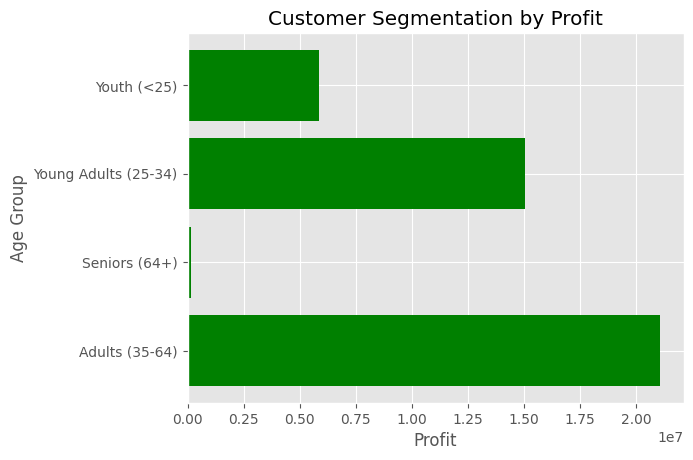

In [23]:
style.use("ggplot")
a = df2["Age_Group"].tolist()
b = df2["Profit"].tolist()
plt.barh(a, b, color = "g")
plt.ylabel("Age Group")
plt.xlabel("Profit")
plt.title("Customer Segmentation by Profit")
plt.show()

This dataset was intended for analysis to identify the effects of different Age Group on revenue and profit
And from our analyis, we've seen that adults between ages 35 and 64 drive more sales and in return bring more profit.

Using a vertical bar chart, let's do another analysis to see how many of each products were sold.


In [25]:
# Grouping product category and looking for the sum of each category

grp2 = sales_df.groupby(["Product_Category"])
df3 = grp2["Order_Quantity"].sum().reset_index().rename(columns={'Order_Quantity': 'Order_Quantity'})
df3 = df3.sort_values(by= "Order_Quantity", ascending= True)
df3.head()

,Product_Category,Order_Quantity
1,Bikes,36411
2,Clothing,254743
0,Accessories,1054162


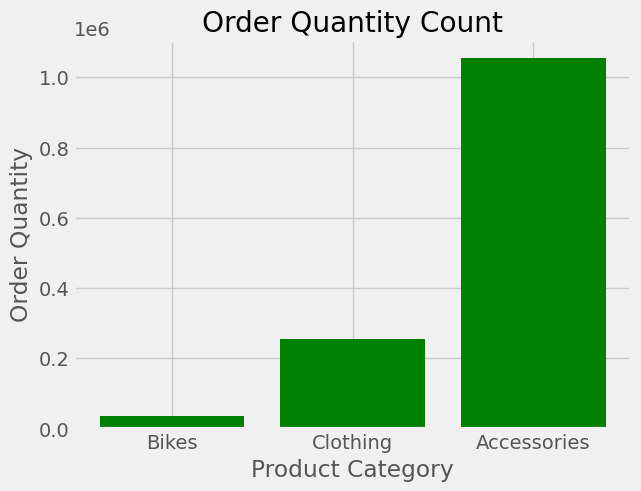

In [26]:
# Plotting the bar chart

style.use("fivethirtyeight")
c = df3["Product_Category"].tolist()
d = df3["Order_Quantity"].tolist()
plt.bar(c, d, color = "g")
plt.ylabel("Order Quantity")
plt.xlabel("Product Category")
plt.title("Order Quantity Count")
plt.show()

In [27]:
# This is the file we'll use in power bi
sales_df.to_csv("./clean_product_sales")